In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
 ## Divide the dataset into independent and dependent features

 X=dataset.iloc[:,3:13]
 y=dataset.iloc[:,13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [14]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [16]:
## remove the categorical column
X=X.drop(['Geography','Gender'],axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
## concatenate these variables with dataframe
X=pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [19]:
# Splittig the dataset into Training set and the Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [24]:
X_train.shape

(8000, 8)

In [25]:
## Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [26]:
## Lets initialize the ANN
classifier=Sequential()

In [28]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [29]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [30]:
 # Adding the second hidden layer
 classifier.add(Dense(units=6,activation='relu'))

In [31]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [33]:
# Compile the model with Adam optimizer, binary crossentropy loss (for binary classification),
# and track accuracy as the evaluation metric
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
# Create an Adam optimizer with a custom learning rate of 0.01
# (Adam is an adaptive optimizer that combines momentum and RMSprop)
tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [46]:
# Early stopping callback to stop training when validation loss stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",            # Watch validation loss
    min_delta=0,                   # Minimum change to qualify as an improvement
    patience=20,                    # Stop immediately if no improvement
    verbose=1,                     # Set to 1 to print messages
    mode="auto",                   # Automatically decide whether to minimize or maximize
    baseline=None,                 # Optional baseline to reach
    restore_best_weights=False,   # Do not restore weights from best epoch
    start_from_epoch=0            # Start checking from first epoch
)

In [47]:
# Train the model on the training data
# - validation_split=0.33: 33% of training data used for validation
# - batch_size=10: model updates weights after every 10 samples
# - epochs=1000: run up to 1000 epochs (but early stopping may halt it sooner)
# - callbacks=[early_stopping]: apply early stopping during training
model_history = classifier.fit(X_train, y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8594 - loss: 0.3327 - val_accuracy: 0.8451 - val_loss: 0.3790
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8666 - loss: 0.3115 - val_accuracy: 0.8493 - val_loss: 0.3803
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8675 - loss: 0.3186 - val_accuracy: 0.8432 - val_loss: 0.3802
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8639 - loss: 0.3312 - val_accuracy: 0.8459 - val_loss: 0.3844
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8645 - loss: 0.3280 - val_accuracy: 0.8459 - val_loss: 0.3852
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8571 - loss: 0.3404 - val_accuracy: 0.8455 - val_loss: 0.3817
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8661 - loss: 0.3224 - val_accuracy: 0.8474 - val_loss: 0.3799
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8623 - loss: 0.3260 - 

In [49]:
# Display all the metrics recorded during training (e.g., loss, accuracy, val_loss, val_accuracy)
model_history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

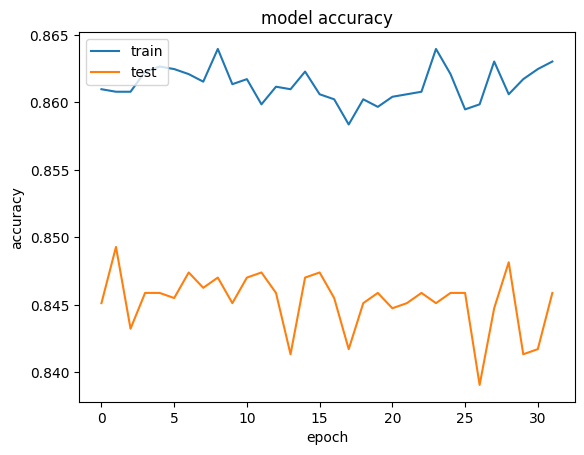

In [50]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

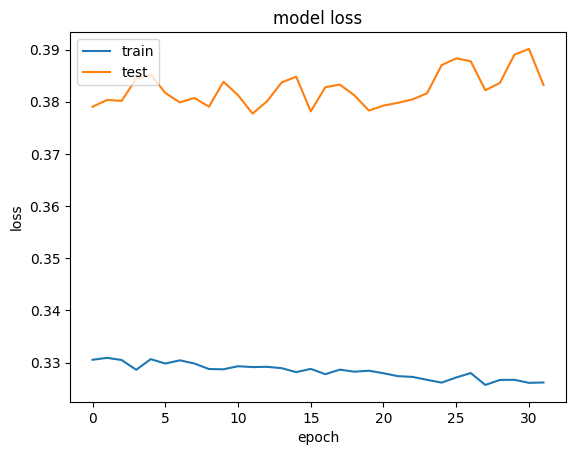

In [51]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
# Making the Predictions and evaluating the model

# Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [54]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1532,   63],
       [ 226,  179]])

In [55]:
## Calculate the accracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8555

In [59]:
## get the weights
classifier.get_weights()

[array([[ 0.02381099,  0.22706002, -0.14715508, -0.06404439,  0.36513418,
         -0.05070693,  0.0402548 ,  0.0248477 , -0.05314981, -0.20182723,
         -0.00786149],
        [-0.89334065, -0.2818693 ,  0.5904791 ,  0.8348947 , -0.80874807,
          0.28642228, -0.2180868 ,  0.46302056,  0.93903536, -0.74064785,
         -0.49360374],
        [-0.33529744, -0.11107821, -0.2118306 , -0.15098196,  0.08947327,
          0.3385499 , -0.20530434, -0.21702926,  0.05409306, -0.08333877,
         -0.15597132],
        [ 0.3534504 , -0.8728105 ,  0.13885394, -0.1149701 ,  0.07750737,
         -0.07948676,  0.17929895,  0.41584224, -0.2851153 , -0.5330655 ,
         -0.0915244 ],
        [-0.8067345 , -0.05945747, -0.2632    ,  0.8492016 ,  0.28272665,
          0.36706543, -0.13153188,  0.8395782 , -0.94669086,  0.28830016,
          0.4804839 ],
        [ 0.59758645,  0.22675358, -0.10787904, -0.14665908, -0.28181142,
          0.22588883, -0.25099307,  0.17288907, -0.10216044, -0.7188767